In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
import seaborn as sn

In [3]:
features = ["current_player_score",
            "opponent_score",
            "current_player_deadwood",
            "current_player_num_hit_cards",
            # alpha to here                 features[:4]
            "num_melds",
            "point_sum_melds",
            "num_combos",
            "point_sum_combos",
            "num_knock_cache",
            "point_sum_knock_cache",
            "num_load_cards",
            "point_sum_load_cards",
            "turns_taken"
            # beta to here                 features[:13]
           ]

In [112]:
df = pd.read_csv('beta-10.csv')
df

# np.set_printoptions(edgeitems = 200, linewidth = 150)
# df.values.T[-1]

,current_player,is_current_player_hand_winner,is_current_player_game_winner,current_player_score,opponent_score,current_player_deadwood,current_player_num_hit_cards,num_melds,point_sum_melds,num_combos,point_sum_combos,num_knock_cache,point_sum_knock_cache,num_load_cards,point_sum_load_cards,turns_taken
0,1.0,1,1,0.0,0.0,48.0,1.0,1.0,24.0,0.0,0.0,3.0,5.0,4.0,39.0,0.0
1,0.0,0,0,0.0,0.0,43.0,3.0,1.0,12.0,1.0,13.0,3.0,6.0,2.0,18.0,0.0
2,0.0,0,0,0.0,0.0,43.0,2.0,1.0,16.0,1.0,13.0,3.0,6.0,2.0,18.0,0.0
3,0.0,0,0,0.0,0.0,33.0,2.0,1.0,16.0,1.0,13.0,3.0,6.0,1.0,8.0,1.0
4,1.0,1,1,0.0,0.0,48.0,1.0,1.0,24.0,0.0,0.0,3.0,5.0,4.0,39.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
37544,1.0,0,0,96.0,52.0,55.0,8.0,0.0,0.0,3.0,20.0,4.0,4.0,4.0,26.0,1.0
37545,0.0,1,1,52.0,96.0,13.0,2.0,2.0,19.0,1.0,2.0,2.0,2.0,1.0,8.0,1.0
37546,0.0,1,1,52.0,96.0,9.0,1.0,3.0,22.0,0.0,0.0,1.0,8.0,0.0,0.0,1.0
37547,0.0,1,1,52.0,96.0,0.0,1.0,3.0,22.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0


In [139]:
f =  ['current_player_score', 'opponent_score', 'current_player_deadwood', 'current_player_num_hit_cards'] # ["num_melds","point_sum_melds","num_combos","point_sum_combos","num_knock_cache","point_sum_knock_cache","num_load_cards","point_sum_load_cards","turns_taken"] # ['current_player_score', 'opponent_score', 'current_player_deadwood', 'current_player_num_hit_cards'] #

var = "current_player_deadwood"
g = "is_current_player_game_winner"

print("\n".join(f))

current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards


# Linear

CSV LINE:

0.5613942032,0.0057191726,-0.0056378723,-0.0019347248,0.0018554090,0,0,0,0,0,0,0,0,0 


R^2:   0.1318231151977235 




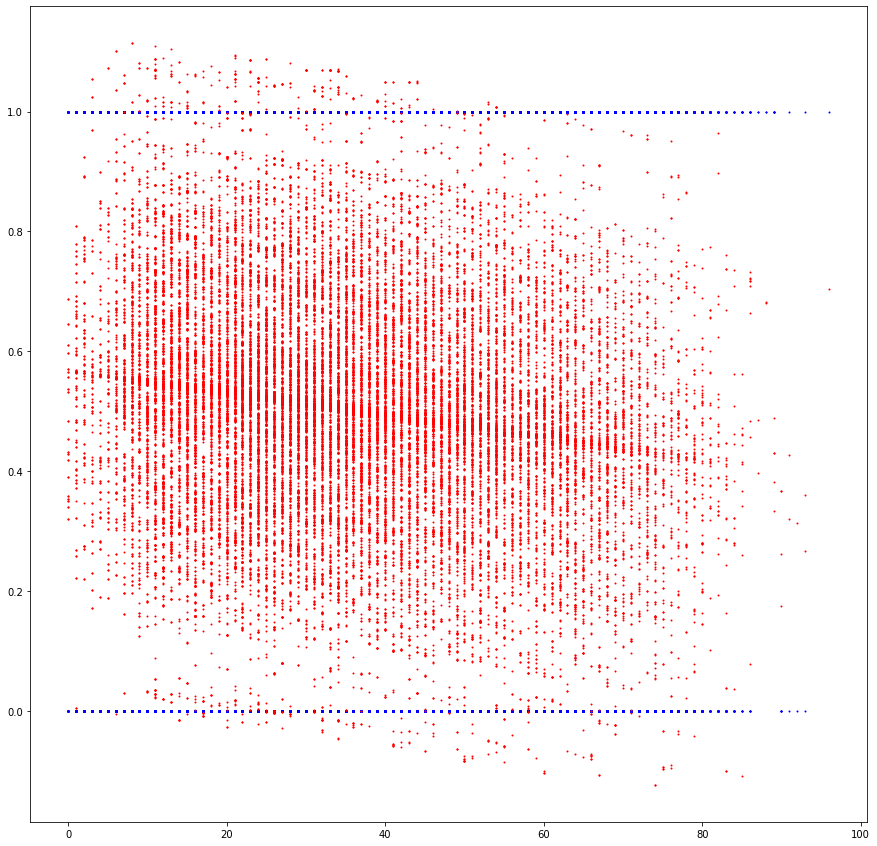

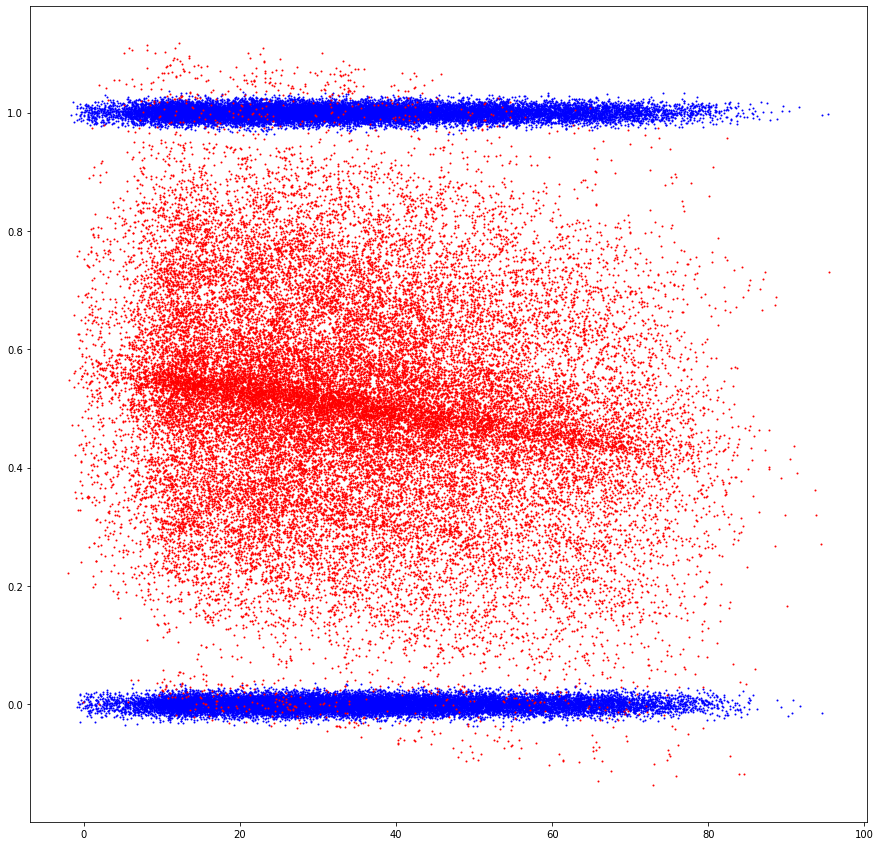

In [140]:
X = df[f]
y = df[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(features)):
    if features[i] in f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][f.index(features[i])])
    else:
        line += ",0"
print(line, "\n\n")

print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()

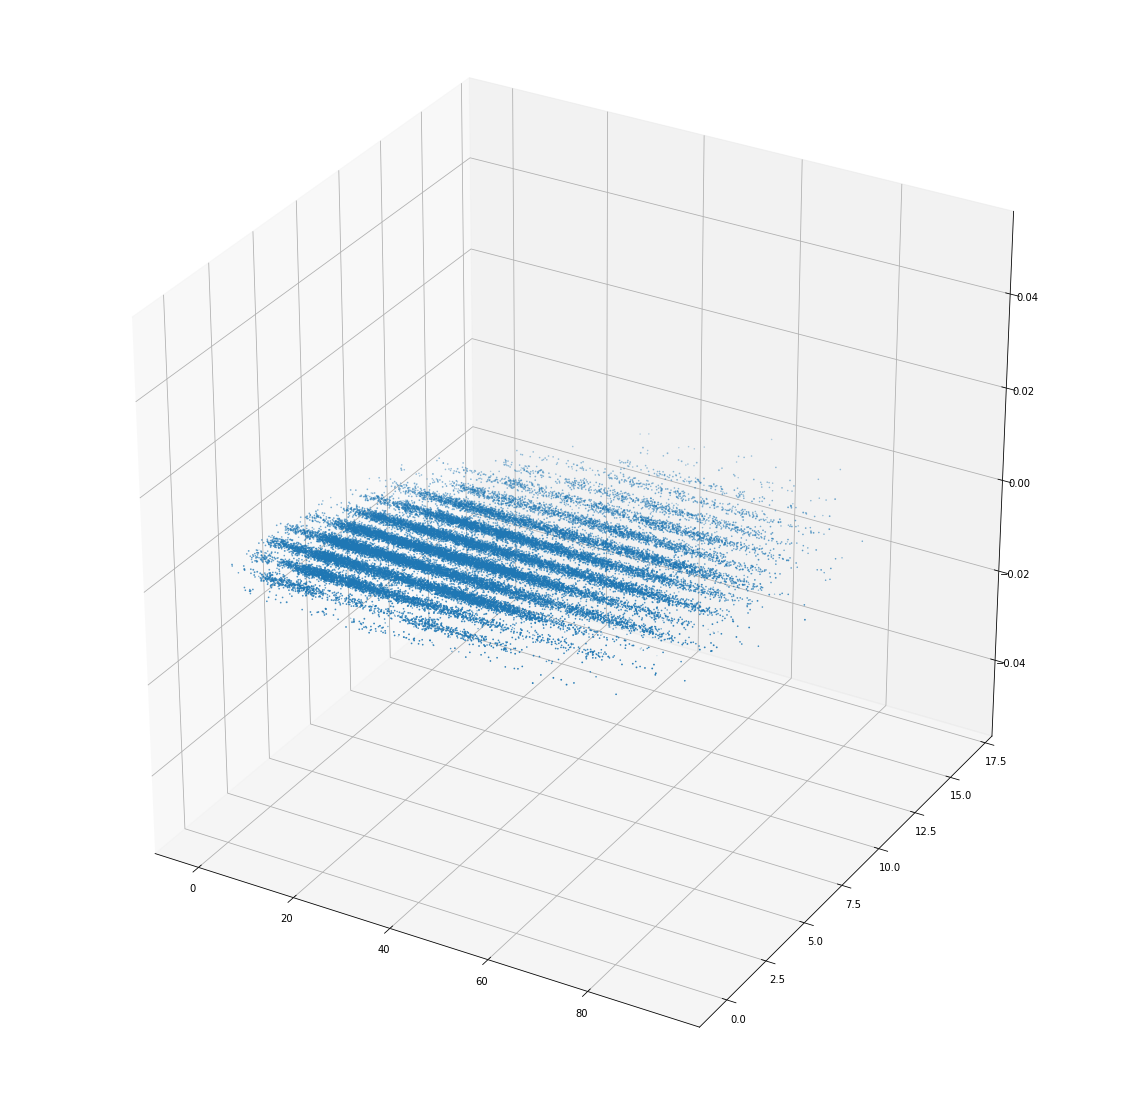

In [142]:
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure(figsize=(20,20))
ax = fig.add_subplot(111, projection='3d')
plt.scatter(jitter(X[["current_player_deadwood"]].values.T[0]), jitter(X[["current_player_num_hit_cards"]].values.T[0]), jitter(y_pred.T[0]))

# Quadratic

In [115]:
# copy df to df2
# choose any two (not necessarily distinct) columns of df, multiply them coordinate wise, and append this column to df2

current_player_score
opponent_score
current_player_deadwood
current_player_num_hit_cards
current_player_score_$_current_player_score
current_player_score_$_opponent_score
current_player_score_$_current_player_deadwood
current_player_score_$_current_player_num_hit_cards
opponent_score_$_opponent_score
opponent_score_$_current_player_deadwood
opponent_score_$_current_player_num_hit_cards
current_player_deadwood_$_current_player_deadwood
current_player_deadwood_$_current_player_num_hit_cards
current_player_num_hit_cards_$_current_player_num_hit_cards 


CSV LINE:

0.9742304300,0.0013964413,-0.0009266863,-0.0240237485,0.0202198660,0,0,0,0,0,0,0,0,0,-0.0000018225,0.0000038088,-0.0000044502,-0.0002951483,0,0,0,0,0,0,0,0,0,0.0000016872,0.0000208607,0.0000511227,0,0,0,0,0,0,0,0,0,0.0001878630,0.0005317109,0,0,0,0,0,0,0,0,0,-0.0030814918,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0 


R^2:   0.08070342249291329 




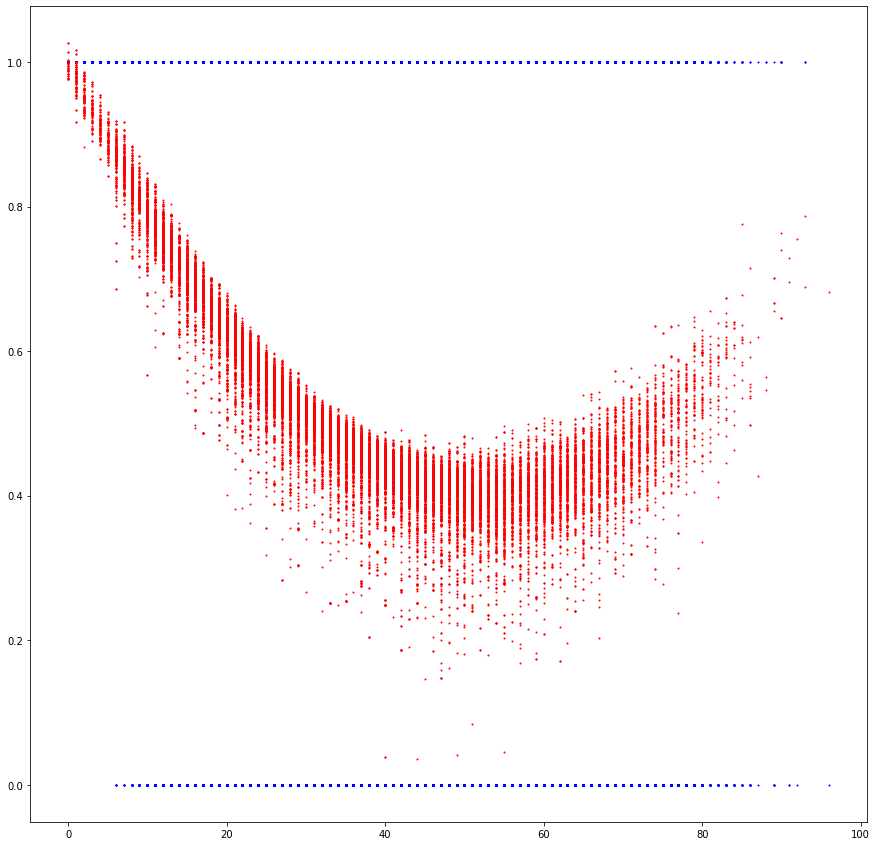

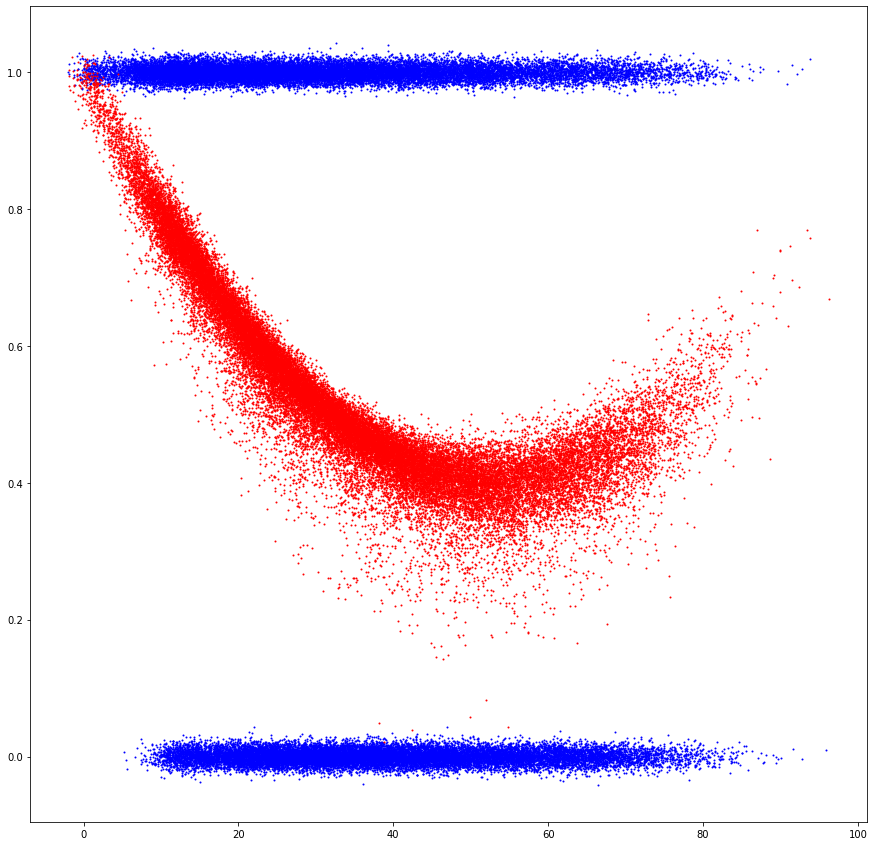

In [126]:
df2 = df.copy()

quadratic_f = f.copy()
quadratic_features = features.copy()

for i in range(len(features)):
    for j in range(i, len(features)):
        new_feature = features[i] + "_$_" + features[j]
        df2[new_feature] = df[features[i]] *  df[features[j]]
        quadratic_features += [new_feature]
        if features[i] in f and features[j] in f:
            quadratic_f += [new_feature]

print("\n".join(quadratic_f), "\n\n")            

X = df2[quadratic_f]
y = df2[[g]]

linear_regressor = LinearRegression()
linear_regressor.fit(X, y)

print("CSV LINE:\n")
line =  '{0:.10f}'.format(linear_regressor.intercept_[0])
for i in range(len(quadratic_features)):
    if quadradic_features[i] in quadratic_f:
        line += ',' + '{0:.10f}'.format(linear_regressor.coef_[0][quadratic_f.index(quadratic_features[i])])
    else:
        line += ",0"
print(line, "\n\n")



print("R^2:  ", linear_regressor.score(X, y), "\n\n")

y_pred = linear_regressor.predict(X)

fig = plt.figure(figsize=(15,15))
plt.scatter(X[[var]], y[[g]], s=1, color='blue')
plt.scatter(X[[var]], y_pred.T[0], s=1, color='red')
plt.show()


def jitter(arr):
    stdev = 0.01 * (max(arr) - min(arr))
    return arr + np.random.randn(len(arr)) * stdev

fig = plt.figure(figsize=(15,15))
plt.xticks(range(0,200,20))
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y[[g]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X[[var]].values.T[0]), jitter(y_pred.T[0]), s=1, color='red')
plt.show()


# logistic

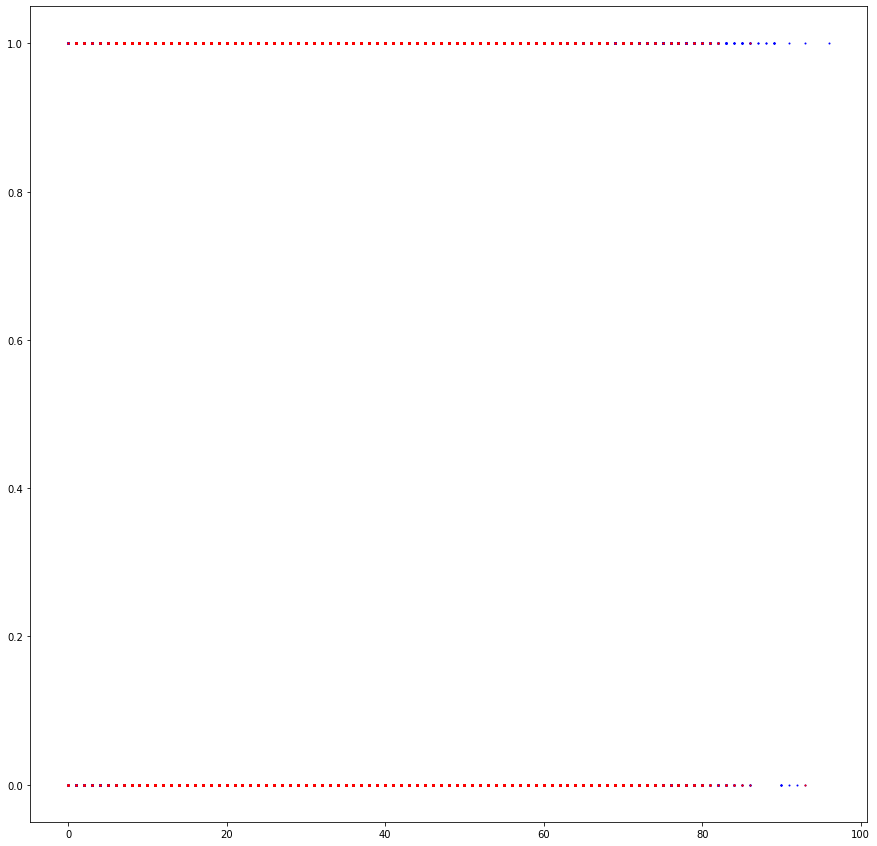

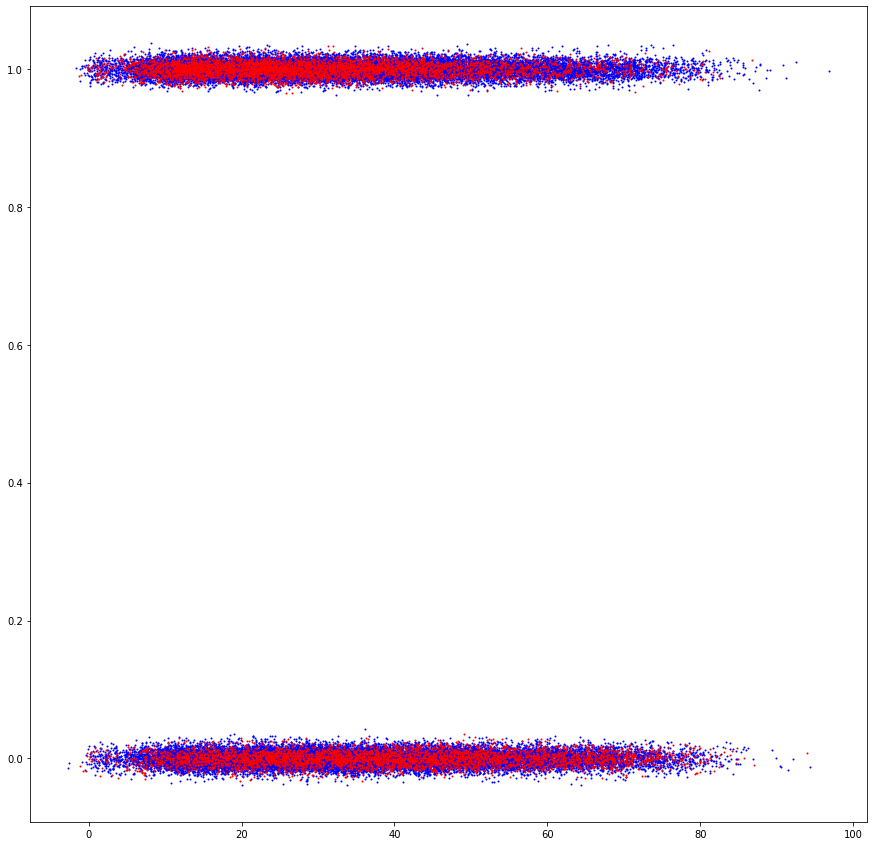

In [21]:
X = df[f]
y = df[["is_current_player_game_winner"]]


X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=0)


logistic_regression= LogisticRegression()
logistic_regression.fit(X_train,y_train.values.T[0])
y_pred=logistic_regression.predict(X_test)

model = LogisticRegression().fit(X_train, y_train.values.T[0])

predictions = model.predict(X_test)


fig = plt.figure(figsize=(15,15))
plt.scatter(X[['current_player_deadwood']], y[["is_current_player_game_winner"]], s=1, color='blue')
plt.scatter(X_test[['current_player_deadwood']].values.T[0], predictions, s=1, color='red')
plt.show()

fig = plt.figure(figsize=(15,15))
plt.scatter(jitter(X[['current_player_deadwood']].values.T[0]), jitter(y[["is_current_player_game_winner"]].values.T[0]), s=1, color='blue')
plt.scatter(jitter(X_test[['current_player_deadwood']].values.T[0]), jitter(predictions), s=1, color='red')
plt.show()